## Leaf background subtraction

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the image

In [48]:
img = 'imageTest.jpeg'

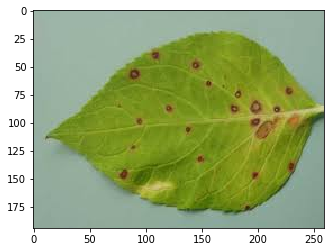

In [49]:
mainImage = cv2.imread(img)
image = cv2.cvtColor(mainImage, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap= 'Greys_r')
xInit, yInit, _ = mainImage.shape
plt.show()

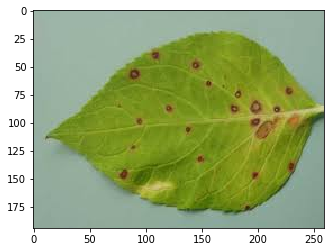

In [50]:
resized_image = cv2.resize(image, (yInit, xInit))
plt.imshow(resized_image,cmap="Greys_r")

In [51]:
y, X, _ = resized_image.shape
print(y, X)

194 259


### Converting image to greyscale

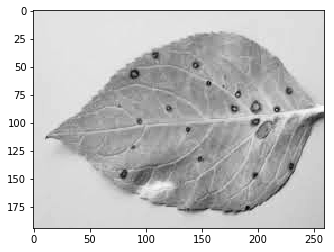

In [52]:
gsImg = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gsImg, cmap= 'Greys_r')

### Smoothing image using Gaussian filter

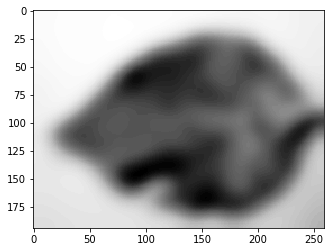

In [53]:
blur = cv2.GaussianBlur(gsImg, (55,55), 0)
plt.imshow(blur, cmap= 'Greys_r')

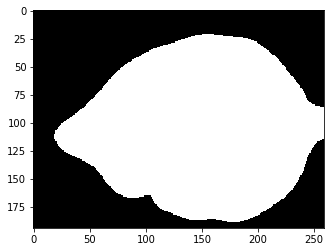

In [54]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

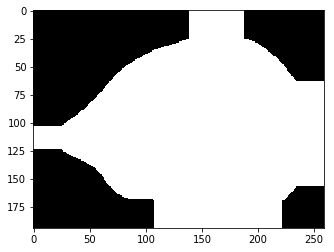

In [55]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="Greys_r")

In [56]:
image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

1

In [57]:
def find_contour(cnts):
    contains = []
    y_ri,x_ri = im_bw_otsu.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

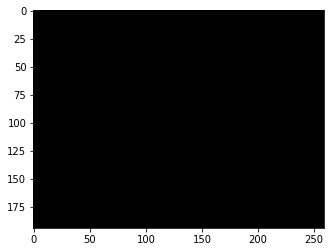

In [58]:
black_img = np.empty([y,X,3],dtype=np.uint8)
black_img.fill(1)
plt.imshow(black_img,cmap="Greys_r")

[1.0]


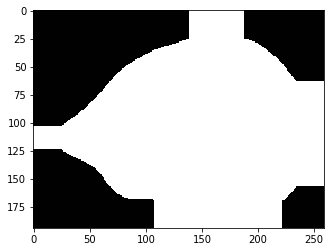

In [59]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

In [60]:
maskedImg = cv2.bitwise_and(resized_image, mask)

In [61]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = maskedImg
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):    
            final_img[y,x] = white_pix

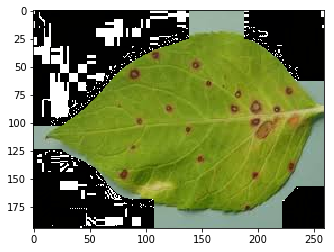

In [62]:
plt.imshow(final_img)

In [63]:
params = cv2.SimpleBlobDetector_Params()
params.blobColor = (170+42+42)/3
params.filterByColor = True

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(final_img, None)

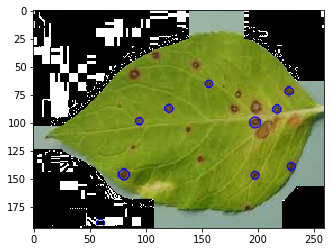

In [64]:
im_with_keypoints = cv2.drawKeypoints(final_img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)